# Import Libraries

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Load Data

### Data Source:
https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan?resource=download

In [110]:
loan_data = pd.read_csv('C:/Users/muham/Downloads/Personal Development/Projects/Group Projects/Eligibility Prediction for Loan/Loan_Data.csv')

In [111]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [112]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Certain columns with missing data:
- Gender
- Married
- Dependents
- Self_Employed
- LoanAmount
- Loan_Amount_Term
- Credit_History

Mix of numerical and categorical variables:
- Numerical Variables:
    - ApplicantIncome
    - CoapplicantIncome
    - LoanAmount
    - Loan_Amount_Term
- Categorical Variables:
    - Dependents
    - Gender
    - Married
    - Education
    - Self_Employed
    - Credit_History
    - Property_Area

Target variable is Loan_Status

In [113]:
# drop Index
data = loan_data.drop(columns = ['Loan_ID'], inplace = False)

In [114]:
data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Exploratory Data Analysis (EDA)

In [115]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


Possibility of some outliers in LoanAmount and Loan_Amount_Term

# Numerical Features - Univariate Analysis

## Boxplot & Histogram

### ApplicantIncome

<AxesSubplot:xlabel='ApplicantIncome'>

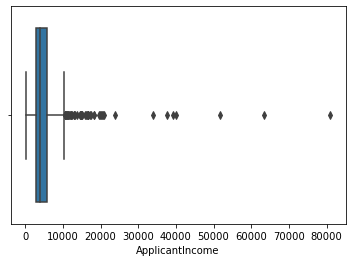

In [116]:
sns.boxplot(x=data['ApplicantIncome'])

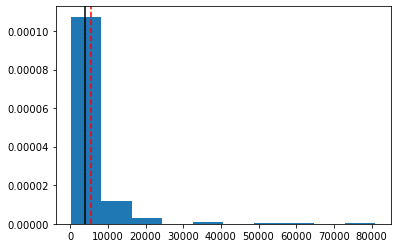

In [117]:
import matplotlib.pyplot as plt
hist = plt.hist(x=data['ApplicantIncome'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(data['ApplicantIncome'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(data['ApplicantIncome'].median(), color = 'black', linestyle='-')

Observations:
- Positiveky skewed distribution
- Outliers on right hand side, but expected with Income
- Mean and Median close enough

### CoapplicantIncome

<AxesSubplot:xlabel='CoapplicantIncome'>

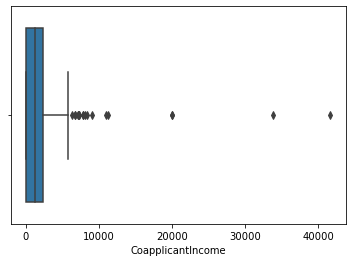

In [118]:
sns.boxplot(x=data['CoapplicantIncome'])

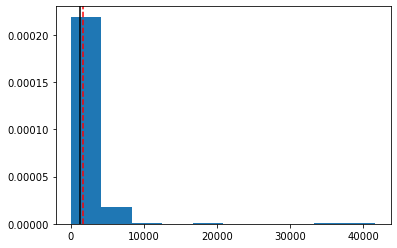

In [119]:
import matplotlib.pyplot as plt
hist = plt.hist(x=data['CoapplicantIncome'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(data['CoapplicantIncome'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(data['CoapplicantIncome'].median(), color = 'black', linestyle='-')

Observations:
- Positiveky skewed distribution
- Outliers on right hand side, but expected with Income
- Mean and Median close enough

### LoanAmount

<AxesSubplot:xlabel='LoanAmount'>

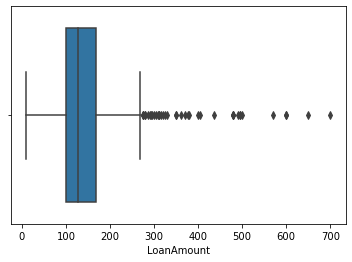

In [120]:
sns.boxplot(x=data['LoanAmount'])

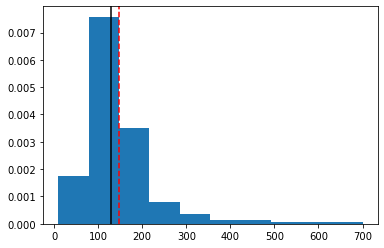

In [121]:
import matplotlib.pyplot as plt
hist = plt.hist(x=data['LoanAmount'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(data['LoanAmount'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(data['LoanAmount'].median(), color = 'black', linestyle='-')

Observations:
- Slightly positiveky skewed distribution
- Outliers on right hand side, which may need to be treated
- Mean and Median close enough

# Categorical Features - Univariate Analysis

### Dependents

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3+')])

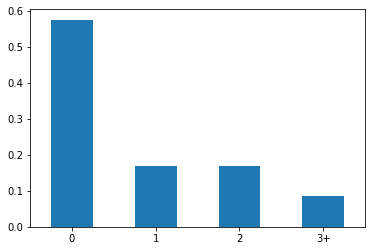

In [122]:
data['Dependents'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Almost 60% of population has 0 dependents

### Gender

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

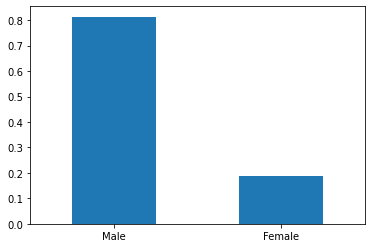

In [123]:
data['Gender'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Almost 80% of population is Male

### Married

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

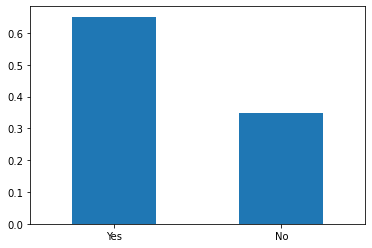

In [124]:
data['Married'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Alittle over 60% of population is Married

### Education

(array([0, 1]), [Text(0, 0, 'Graduate'), Text(1, 0, 'Not Graduate')])

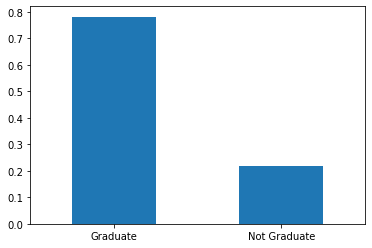

In [125]:
data['Education'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Almost 80% of population is Graduate

### Self_Employed

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

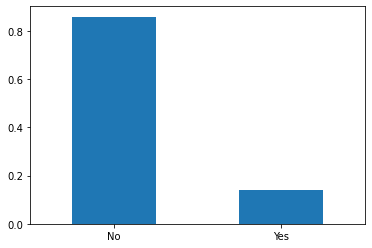

In [126]:
data['Self_Employed'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Almost 80% of population is salaried

### Credit_History

(array([0, 1]), [Text(0, 0, '1.0'), Text(1, 0, '0.0')])

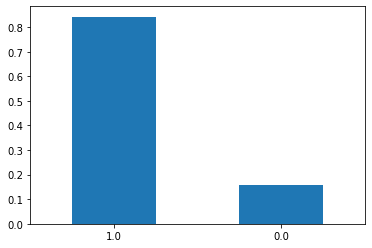

In [127]:
data['Credit_History'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Almost 80% of population has a credit history

### Property_Area

(array([0, 1, 2]),
 [Text(0, 0, 'Semiurban'), Text(1, 0, 'Urban'), Text(2, 0, 'Rural')])

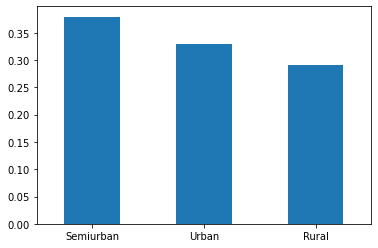

In [128]:
data['Property_Area'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Majority of population resides in Urban / Semi-Urban areas

# Bivariate / Multivariate Analysis

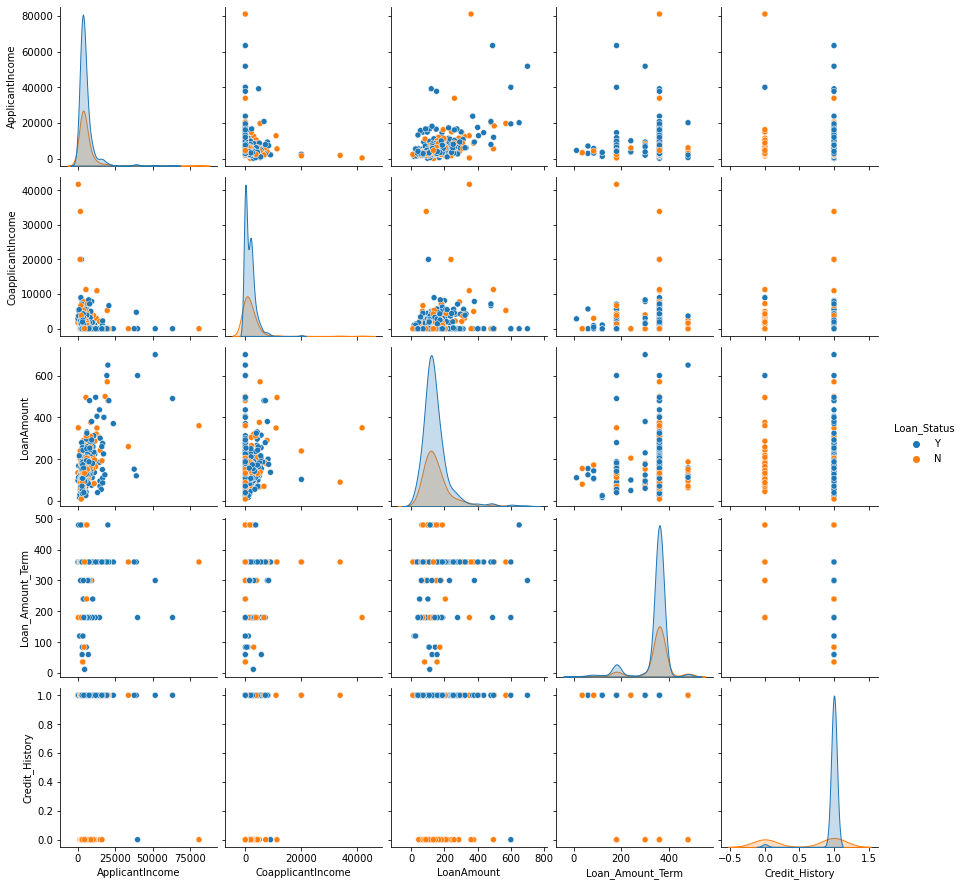

In [129]:
sns.pairplot(loan_data, diag_kind= 'kde', hue = 'Loan_Status')

In [130]:
# Identify Correlation
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [131]:
data.corr(method = 'spearman')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.320056,0.515397,-0.040111,0.043241
CoapplicantIncome,-0.320056,1.000000,0.240719,-0.013747,-0.007458
LoanAmount,0.515397,0.240719,1.000000,0.041486,-0.002361
Loan_Amount_Term,-0.040111,-0.013747,0.041486,1.000000,0.015088
Credit_History,0.043241,-0.007458,-0.002361,0.015088,1.000000


<AxesSubplot:>

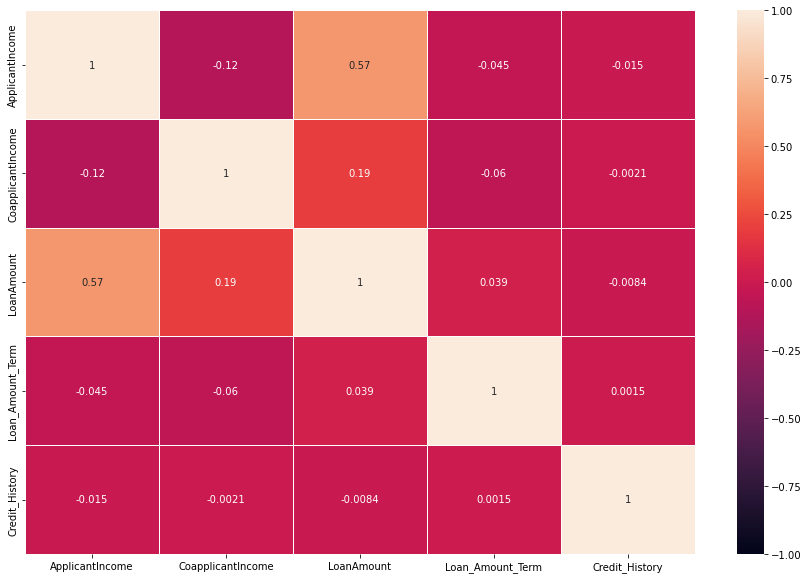

In [132]:
# Plot the Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')

<AxesSubplot:>

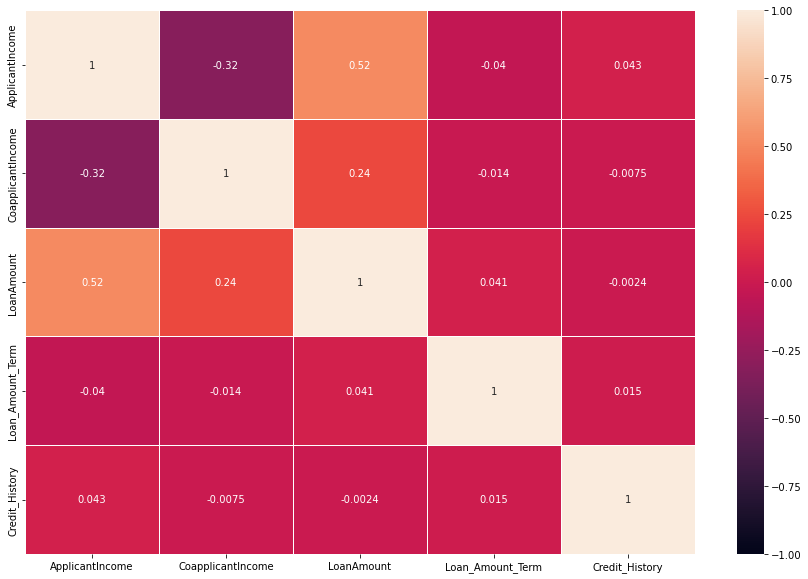

In [133]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method = 'spearman'), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')

Very high correlation between 'ApplicantIncome' and 'LoanAmount' - therefore, one of them needs to be dropped to prevent independent variable multicollinearity

Pre-processing steps:
    - replace / drop outliers
    - impute values in blanks
    - get dummies for categorical variables (one-hot encoding)
    - concat these dummies and drop original categorical variables
    

In [134]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Preprocessing

## Imputing null values

In [135]:
# Imputing null for categorical variables with mode
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Education'] = data['Education'].fillna(data['Education'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [136]:
# Imputing null for numerical variables with mean
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace = True)

In [137]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Detecting multicollinearity

In [138]:
# Calculating VIF for all numerical variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

vif = pd.DataFrame()
vif["features"] = x.columns
vif["vif_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,features,vif_Factor
0,ApplicantIncome,2.845794
1,CoapplicantIncome,1.458045
2,LoanAmount,6.457683
3,Loan_Amount_Term,3.753503


In [139]:
# Calculating VIF for all numerical variables except LoanAmount
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = data[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']]

vif = pd.DataFrame()
vif["features"] = x.columns
vif["vif_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,features,vif_Factor
0,ApplicantIncome,1.724216
1,CoapplicantIncome,1.287776
2,Loan_Amount_Term,2.072653


Since VIF fector has significantly reduced, it is best to drop LoanAmount from the set of independent variables

In [140]:
# Drop LoanAmount from data set
#data.drop(columns = ['LoanAmount'], inplace = True)

### Balancing Dataset

In [141]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [142]:
import imblearn

In [143]:
from imblearn.over_sampling import RandomOverSampler

In [144]:
ros = RandomOverSampler(random_state=0)

In [145]:
x = data.drop(columns = ['Loan_Status'])
y = data['Loan_Status']

In [146]:
x, y = ros.fit_resample(x, y)

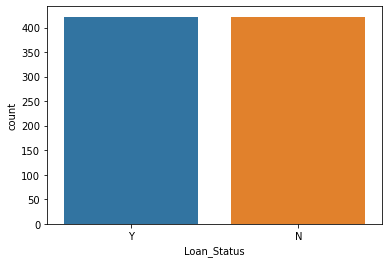

In [147]:
ax = sns.countplot(x=y)

In [148]:
df1=pd.concat([x,y],axis=1)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Outlier Treatment

In [149]:
import scipy.stats as stats

There are outliers in ApplicantIncome, CoapplicantIncome and Loan_Amount_Term. We will do one at a time

#### ApplicantIncome

In [150]:
# calculate the z-score of every value in ApplicantIncome column
#z = np.abs(stats.zscore(df1['ApplicantIncome']))
# filter out observations that lie 3 SD beyond the z-score
#np.where(z > 3)

In [151]:
# replace the outlier values with mean of the column
#df1.loc[[126, 155, 171, 183, 185, 333, 409, 443], 'ApplicantIncome'] = df1['ApplicantIncome'].mean()

#### CoapplicantIncome

In [152]:
# calculate the z-score of every value in ApplicantIncome column
#z = np.abs(stats.zscore(df1['CoapplicantIncome']))
# filter out observations that lie 3 SD beyond the z-score
#np.where(z > 3)

In [153]:
# replace the outlier values with mean of the column
#df1.loc[[9, 177, 402, 417, 581, 600], 'CoapplicantIncome'] = df1['CoapplicantIncome'].mean()

#### LoanAmount

In [154]:
# calculate the z-score of every value in ApplicantIncome column
#z = np.abs(stats.zscore(df1['LoanAmount']))
# filter out observations that lie 3 SD beyond the z-score
#np.where(z > 3)

In [155]:
# replace the outlier values with mean of the column
#df1.loc[[130, 155, 171, 177, 278, 308, 333, 369, 432, 487, 506, 523, 525,
#        561, 604], 'LoanAmount'] = df1['LoanAmount'].mean()

#### Loan_Amount_Term

In [156]:
# calculate the z-score of every value in ApplicantIncome column
#z = np.abs(stats.zscore(df1['Loan_Amount_Term']))
# filter out observations that lie 3 SD beyond the z-score
#np.where(z > 3)

In [157]:
# replace the outlier values with mean of the column
#df1.loc[[14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585], 'Loan_Amount_Term'] = df1['Loan_Amount_Term'].mean()

In [158]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,844.0,5261.742891,5599.933498,150.0,2873.0,3848.0,5746.00,81000.0
CoapplicantIncome,844.0,1738.533081,3445.573543,0.0,0.0,1250.0,2401.25,41667.0
LoanAmount,844.0,148.110190,84.408716,9.0,103.0,128.0,170.00,700.0
Loan_Amount_Term,844.0,343.251185,65.238669,12.0,360.0,360.0,360.00,480.0
Credit_History,844.0,0.787915,0.409027,0.0,1.0,1.0,1.00,1.0


## Data Prep for Moedling

In [159]:
# OneHotEncoding of object dtype columns
cat_cols = ['Dependents','Gender','Married','Education','Self_Employed','Credit_History','Property_Area']
dummies = pd.get_dummies(df1[cat_cols])
dummies

,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1
1,1.0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0
2,1.0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1
3,1.0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1
4,1.0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,0.0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0
840,1.0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1
841,1.0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
842,0.0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0


In [160]:
#Concat dummmies into data frame
df1 = pd.concat([df1, dummies], axis = 1)

In [161]:
df1.shape

(844, 28)

In [162]:
# Drop original categorical columns from data frame
df1 = df1.drop(cat_cols, axis = 1)

In [163]:
df1.shape

(844, 20)

In [164]:
# determine whether tha target column is balanced or not
y.value_counts()

Y    422
N    422
Name: Loan_Status, dtype: int64

In [165]:
from sklearn.preprocessing import LabelEncoder

In [166]:
df1['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
839    N
840    N
841    N
842    N
843    N
Name: Loan_Status, Length: 844, dtype: object

In [167]:
labelencoder = LabelEncoder()

In [168]:
# Convert the target variable into binary format
y = labelencoder.fit_transform(df1['Loan_Status'])

In [169]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [170]:
# segregate the target variable
x = df1.drop(columns = ['Loan_Status'])
# y = data['Loan_Status']

# splitting data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42, stratify = y)

In [171]:
x_train.shape

(633, 19)

In [172]:
x_test.shape

(211, 19)

In [173]:
y_train.shape

(633,)

In [174]:
y_test.shape

(211,)

# RandomForest Classifier

In [175]:
rf = RandomForestClassifier(random_state = 42, class_weight = 'balanced')
rf.fit(x_train, y_train)
predictions_rf = rf.predict(x_test)

In [176]:
predictions_rf.shape

(211,)

In [177]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

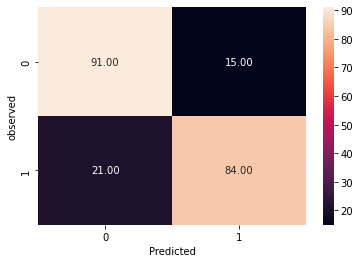

In [178]:
draw_cm(y_test, predictions_rf)

In [179]:
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       106
           1       0.85      0.80      0.82       105

    accuracy                           0.83       211
   macro avg       0.83      0.83      0.83       211
weighted avg       0.83      0.83      0.83       211



In [180]:
import sklearn.metrics as metrics

print('Training accuracy: ',
     metrics.accuracy_score(y_train,rf.predict(x_train)))

print('Testing accuracy: ',
     metrics.accuracy_score(y_test,rf.predict(x_test)))

Training accuracy:  1.0
Testing accuracy:  0.8293838862559242


In [181]:
precision_score(y_test, predictions_rf)

0.8484848484848485

In [182]:
recall_score(y_test, predictions_rf)

0.8

In [183]:
accuracy_score(y_test, predictions_rf)

0.8293838862559242

In [184]:
f1_score(y_test, predictions_rf)

0.823529411764706

In [185]:
roc_auc_score(y_test, predictions_rf)

0.8292452830188679

# Bagging Classifier on Random Forest

In [186]:
baggingrf = BaggingClassifier(rf, random_state = 42)
baggingrf.fit(x_train, y_train)
predictions_baggingrf = baggingrf.predict(x_test)

In [187]:
print(classification_report(y_test, predictions_baggingrf))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       106
           1       0.83      0.69      0.75       105

    accuracy                           0.77       211
   macro avg       0.78      0.77      0.77       211
weighted avg       0.78      0.77      0.77       211



In [188]:
print('Training accuracy: ',
     metrics.accuracy_score(y_train,baggingrf.predict(x_train)))

print('Testing accuracy: ',
     metrics.accuracy_score(y_test,baggingrf.predict(x_test)))

Training accuracy:  0.9826224328593997
Testing accuracy:  0.7725118483412322


In [189]:
precision_score(y_test, predictions_baggingrf)

0.8275862068965517

In [190]:
recall_score(y_test, predictions_baggingrf)

0.6857142857142857

In [191]:
accuracy_score(y_test, predictions_baggingrf)

0.7725118483412322

In [192]:
f1_score(y_test, predictions_baggingrf)

0.75

In [193]:
roc_auc_score(y_test, predictions_baggingrf)

0.7721024258760107

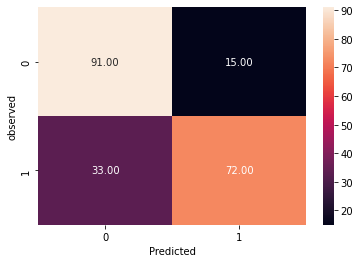

In [194]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

draw_cm(y_test, predictions_baggingrf)

# Logistic Regression Classifier

In [195]:
lr = LogisticRegression(random_state = 42, class_weight = None)
lr.fit(x_train, y_train)
predictions_lr = lr.predict(x_test)

In [196]:
predictions_lr.shape

(211,)

In [197]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

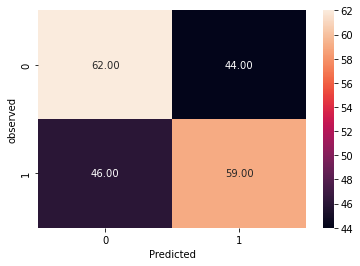

In [198]:
draw_cm(y_test, predictions_lr)

In [199]:
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.57      0.58      0.58       106
           1       0.57      0.56      0.57       105

    accuracy                           0.57       211
   macro avg       0.57      0.57      0.57       211
weighted avg       0.57      0.57      0.57       211



In [200]:
print('Training accuracy: ',
     metrics.accuracy_score(y_train,lr.predict(x_train)))

print('Testing accuracy: ',
     metrics.accuracy_score(y_test,lr.predict(x_test)))

Training accuracy:  0.5624012638230648
Testing accuracy:  0.5734597156398105


In [201]:
precision_score(y_test, predictions_lr)

0.5728155339805825

In [202]:
recall_score(y_test, predictions_lr)

0.5619047619047619

In [203]:
accuracy_score(y_test, predictions_lr)

0.5734597156398105

In [204]:
f1_score(y_test, predictions_lr)

0.5673076923076923

In [205]:
roc_auc_score(y_test, predictions_lr)

0.5734052111410602

# Weighted Logistic Regression Classifier

In [206]:
#define class weights
#w = {1:0.69, 0:0.31}

In [207]:
#wlr = LogisticRegression(random_state = 42, class_weight = w)
#wlr.fit(x_train, y_train)
#predictions_wlr = wlr.predict(x_test)

In [208]:
#predictions_wlr.shape

In [209]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

In [210]:
#draw_cm(y_test, predictions_wlr)

In [211]:
#print(classification_report(y_test, predictions_wlr))

In [212]:
#precision_score(y_test, predictions_wlr)

In [213]:
#recall_score(y_test, predictions_wlr)

In [214]:
#accuracy_score(y_test, predictions_wlr)

In [215]:
#f1_score(y_test, predictions_wlr)

In [216]:
#roc_auc_score(y_test, predictions_wlr)

# KNN Classifier

In [217]:
from sklearn.neighbors import KNeighborsClassifier

In [218]:
knn = KNeighborsClassifier(n_neighbors = 10, algorithm = 'kd_tree')

In [219]:
knn.fit(x_train, y_train)
predictions_knn = knn.predict(x_test)

In [220]:
predictions_knn.shape

(211,)

In [221]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

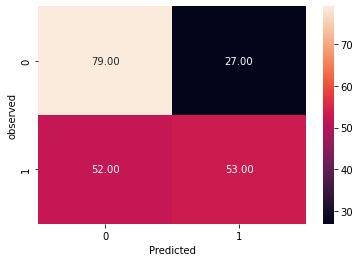

In [222]:
draw_cm(y_test, predictions_knn)

In [223]:
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67       106
           1       0.66      0.50      0.57       105

    accuracy                           0.63       211
   macro avg       0.63      0.63      0.62       211
weighted avg       0.63      0.63      0.62       211



In [224]:
precision_score(y_test, predictions_knn)

0.6625

In [225]:
recall_score(y_test, predictions_knn)

0.5047619047619047

In [226]:
accuracy_score(y_test, predictions_knn)

0.6255924170616114

In [227]:
f1_score(y_test, predictions_knn)

0.5729729729729729

In [228]:
roc_auc_score(y_test, predictions_knn)

0.6250224618149146

# Bagging Classifier on KNN

In [229]:
baggingknn = BaggingClassifier(knn, random_state = 42)
baggingknn.fit(x_train, y_train)
predictions_bknn = baggingknn.predict(x_test)

In [230]:
print(classification_report(y_test, predictions_bknn))

              precision    recall  f1-score   support

           0       0.62      0.72      0.67       106
           1       0.66      0.56      0.61       105

    accuracy                           0.64       211
   macro avg       0.64      0.64      0.64       211
weighted avg       0.64      0.64      0.64       211



In [231]:
precision_score(y_test, predictions_bknn)

0.6629213483146067

In [232]:
recall_score(y_test, predictions_bknn)

0.5619047619047619

In [233]:
accuracy_score(y_test, predictions_bknn)

0.6398104265402843

In [234]:
f1_score(y_test, predictions_bknn)

0.6082474226804124

In [235]:
roc_auc_score(y_test, predictions_bknn)

0.6394429469901168

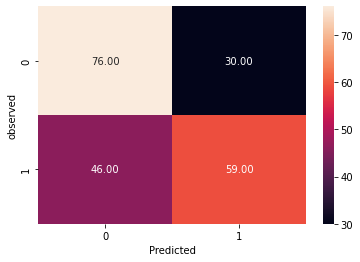

In [236]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

draw_cm(y_test, predictions_bknn)

# SVM Classifier

In [237]:
#model = svm.SVC(kernel='linear')

In [238]:
#model.fit(x_train, y_train)
#predictions = model.predict(x_test)

In [239]:
#predictions.shape

In [240]:
#def draw_cm(actual,predicted):
#    cm = confusion_matrix(actual,predicted)
#    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
#    plt.ylabel('observed')
#    plt.xlabel('Predicted')
#    plt.show()

In [241]:
#draw_cm(y_test, predictions)

In [242]:
#precision_score(y_test, predictions)

In [243]:
#recall_score(y_test, predictions)

In [244]:
#accuracy_score(y_test, predictions)

In [245]:
#f1_score(y_test, predictions)

In [246]:
#roc_auc_score(y_test, predictions)

# Bagging Classifier on SVM

In [247]:
#bagging = BaggingClassifier(model, random_state = 42)
#bagging.fit(x_train, y_train)
#preds2 = bagging.predict(x_test)

In [248]:
#precision_score(y_test, preds2)

In [249]:
#recall_score(y_test, preds2)

In [250]:
#accuracy_score(y_test, preds2)

In [251]:
#f1_score(y_test, preds2)

In [252]:
#roc_auc_score(y_test, preds2)

In [253]:
#def draw_cm(actual,predicted):
#    cm = confusion_matrix(actual,predicted)
#    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
#    plt.ylabel('observed')
#    plt.xlabel('Predicted')
#    plt.show()

#draw_cm(y_test, preds2)

# Model Building - Boosting

## AdaBoost

In [254]:
abc = AdaBoostClassifier(random_state = 42)
abc.fit(x_train, y_train)
predictions_abc = abc.predict(x_test)

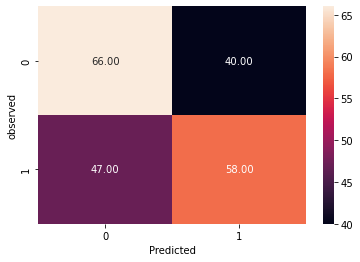

In [255]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

draw_cm(y_test, predictions_abc)

In [256]:
print(classification_report(y_test, predictions_abc))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60       106
           1       0.59      0.55      0.57       105

    accuracy                           0.59       211
   macro avg       0.59      0.59      0.59       211
weighted avg       0.59      0.59      0.59       211



## XGBoost Classifier

In [257]:
# used scale_pos_weight to give more weight to the imbalanced positive class
xgb = XGBClassifier(random_state = 42, scale_pos_weight = 1)
xgb.fit(x_train, y_train)
predictions_xgb = xgb.predict(x_test)

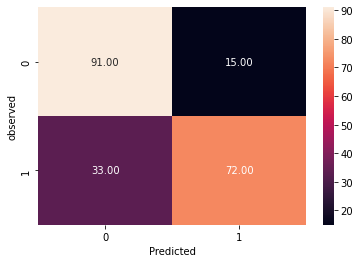

In [258]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

draw_cm(y_test, predictions_xgb)

In [259]:
print(classification_report(y_test, predictions_xgb))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       106
           1       0.83      0.69      0.75       105

    accuracy                           0.77       211
   macro avg       0.78      0.77      0.77       211
weighted avg       0.78      0.77      0.77       211



In [260]:
print('Training accuracy: ',
     metrics.accuracy_score(y_train,xgb.predict(x_train)))

print('Testing accuracy: ',
     metrics.accuracy_score(y_test,xgb.predict(x_test)))

Training accuracy:  1.0
Testing accuracy:  0.7725118483412322


In [261]:
precision_score(y_test, predictions_xgb)

0.8275862068965517

In [262]:
recall_score(y_test, predictions_xgb)

0.6857142857142857

In [263]:
accuracy_score(y_test, predictions_xgb)

0.7725118483412322

In [264]:
f1_score(y_test, predictions_xgb)

0.75

In [265]:
roc_auc_score(y_test, predictions_xgb)

0.7721024258760107

# Cross Validation

In [266]:
from sklearn.model_selection import KFold, cross_val_score

clf = RandomForestClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, x, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.78106509 0.69822485 0.71597633 0.78106509 1.        ]
Average CV Score:  0.7952662721893491
Number of CV Scores used in Average:  5


In [267]:
from sklearn.model_selection import KFold, cross_val_score

clf = XGBClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, x, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.78698225 0.71597633 0.69822485 0.83431953 1.        ]
Average CV Score:  0.8071005917159763
Number of CV Scores used in Average:  5


# Hyperparameter Tuning

In [268]:
# Random forest
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs1 = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='accuracy')
gs1.fit(x_train, y_train)

print('Best score:', gs1.best_score_)
print('Best score:', gs1.best_params_)

Best score: 0.7061611374407583
Best score: {'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


In [ ]:
# XGBoost
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='accuracy')
gs2.fit(x_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)